Colab Link: https://colab.research.google.com/drive/1VKzfu04pJnEt1ykFs5PXZE3uskzz768W

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Principal Component Analysis

### Data Prep

#### Read

In [47]:
dataset = pd.read_csv('data/Wine.csv')
dataset.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [48]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(178, 13)
<class 'numpy.ndarray'>
(178,)


### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Apply PCA

In [7]:
from sklearn.decomposition import PCA

In [52]:
# n_components is the final number of extracted features
# start with 2, increase if the prediction is not good enough
pca = PCA(n_components = 2)  
X_train = pca.fit_transform(X_train)

In [41]:
pca_3 = PCA(n_components = 3)  
X_train_pca3 = pca_3.fit_transform(X_train)

### Train Model and Predict

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train, y_train)
y_pred_lr = c_lr.predict(pca.transform(sc.transform(X_test)))

In [43]:
# Logistic Regression with 3 components
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train_pca3, y_train)
y_pred_lr_pca3 = c_lr.predict(pca_3.transform(sc.transform(X_test)))

In [18]:
# SVM
from sklearn.svm import SVC
c_svc = SVC(kernel="rbf", random_state=0)
c_svc.fit(X_train,y_train)
y_pred_svc = c_svc.predict(pca.transform(sc.transform(X_test)))

In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
c_gnb = GaussianNB()
c_gnb.fit(X_train, y_train)
y_pred_gnb = c_gnb.predict(pca.transform(sc.transform(X_test)))

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(n_estimators=10, random_state=0)
c_rf.fit(X_train, y_train)
y_pred_rf = c_rf.predict(pca.transform(sc.transform(X_test)))

### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

In [27]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression: ",cm_lr)
print("Number of correct predictions using Logistic Regression: ",cm_lr[0][0] + cm_lr[1][1] + cm_lr[2][2])
print("Number of incorrect predictions using Logistic Regression: ",cm_lr[0][1] + cm_lr[0][2] + cm_lr[1][0] + cm_lr[1][2] + cm_lr[2][0] + cm_lr[2][1])

Confusion Matrix for Logistic Regression:  [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Number of correct predictions using Logistic Regression:  35
Number of incorrect predictions using Logistic Regression:  1


In [44]:
# Logistic Regression with 3 components
cm_lr_pca3 = confusion_matrix(y_test, y_pred_lr_pca3)
print("Confusion Matrix for Logistic Regression: ",cm_lr_pca3)
print("Number of correct predictions using Logistic Regression: ",cm_lr_pca3[0][0] + cm_lr_pca3[1][1] + cm_lr_pca3[2][2])
print("Number of incorrect predictions using Logistic Regression: ",cm_lr_pca3[0][1] + cm_lr_pca3[0][2] + cm_lr_pca3[1][0] + cm_lr_pca3[1][2] + cm_lr_pca3[2][0] + cm_lr_pca3[2][1])

Confusion Matrix for Logistic Regression:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Logistic Regression:  36
Number of incorrect predictions using Logistic Regression:  0


In [28]:
# SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVC: ",cm_svc)
print("Number of correct predictions using SVC: ",cm_svc[0][0] + cm_svc[1][1] + cm_svc[2][2])
print("Number of incorrect predictions using SVC: ",cm_svc[0][1] + cm_svc[0][2] + cm_svc[1][0] + cm_svc[1][2] + cm_svc[2][0] + cm_svc[2][1])

Confusion Matrix for SVC:  [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Number of correct predictions using SVC:  35
Number of incorrect predictions using SVC:  1


In [29]:
# Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Naive Bayes: ",cm_gnb)
print("Number of correct predictions using Naive Bayes: ",cm_gnb[0][0] + cm_gnb[1][1] + cm_gnb[2][2])
print("Number of incorrect predictions using Naive Bayes: ",cm_gnb[0][1] + cm_gnb[0][2] + cm_gnb[1][0] + cm_gnb[1][2] + cm_gnb[2][0] + cm_gnb[2][1])

Confusion Matrix for Naive Bayes:  [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Number of correct predictions using Naive Bayes:  35
Number of incorrect predictions using Naive Bayes:  1


In [30]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest: ",cm_rf)
print("Number of correct predictions using Random Forest: ",cm_rf[0][0] + cm_rf[1][1] + cm_rf[2][2])
print("Number of incorrect predictions using Random Forest: ",cm_rf[0][1] + cm_rf[0][2] + cm_rf[1][0] + cm_rf[1][2] + cm_rf[2][0] + cm_rf[2][1])

Confusion Matrix for Random Forest:  [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Number of correct predictions using Random Forest:  35
Number of incorrect predictions using Random Forest:  1


### Evaluate

In [24]:
from sklearn.metrics import accuracy_score

In [54]:
print("Accuracy for Logistic Regression: ",accuracy_score(y_test, y_pred_lr))
print("Accuracy for Logistic Regression with 3 components: ",accuracy_score(y_test, y_pred_lr_pca3))
print("Accuracy for SVC: ",accuracy_score(y_test, y_pred_svc))
print("Accuracy for Naive Bayes: ",accuracy_score(y_test, y_pred_gnb))
print("Accuracy for Random Forest: ",accuracy_score(y_test, y_pred_rf))

Accuracy for Logistic Regression:  0.9722222222222222
Accuracy for Logistic Regression with 3 components:  1.0
Accuracy for SVC:  0.9722222222222222
Accuracy for Naive Bayes:  0.9722222222222222
Accuracy for Random Forest:  0.9722222222222222


### Vizualize

#### Training Set

In [ ]:
from matplotlib.colors import ListedColormap

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/2123219577.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


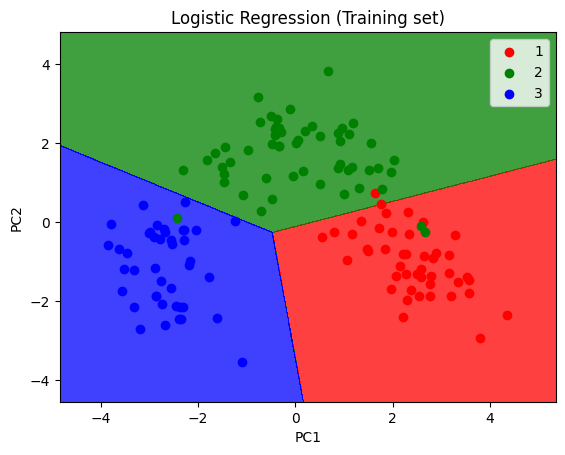

In [32]:
# Logistic Regression Results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### Test Set

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/3704203269.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


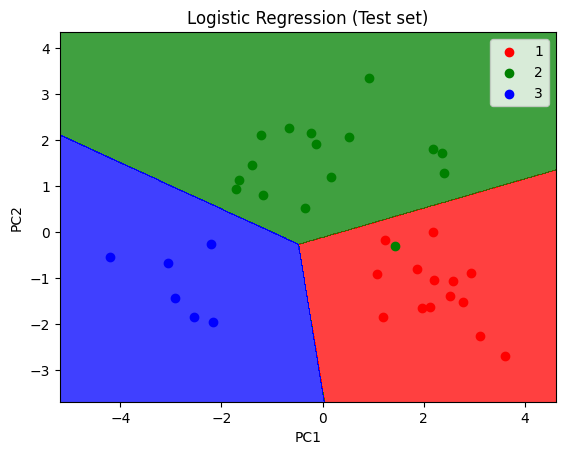

In [34]:
# Logistic Regression Results
X_set, y_set = pca.transform(sc.transform(X_test)), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Linear Discriminant Analysis

### Data Prep

#### Read

In [110]:
dataset = pd.read_csv('data/Wine.csv')
dataset.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [111]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(178, 13)
<class 'numpy.ndarray'>
(178,)


### Train Test Split

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Apply LDA

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [116]:
# n_components is the final number of extracted features
lda = LDA(n_components = 2)
# LDA uses the dependent variable as well
X_train = lda.fit_transform(X_train, y_train)

### Train Model and Predict

In [117]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train, y_train)
y_pred_lr = c_lr.predict(lda.transform(sc.transform(X_test)))

In [72]:
# SVM
from sklearn.svm import SVC
c_svc = SVC(kernel="rbf", random_state=0)
c_svc.fit(X_train,y_train)
y_pred_svc = c_svc.predict(lda.transform(sc.transform(X_test)))

In [73]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
c_gnb = GaussianNB()
c_gnb.fit(X_train, y_train)
y_pred_gnb = c_gnb.predict(lda.transform(sc.transform(X_test)))

In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(n_estimators=10, random_state=0)
c_rf.fit(X_train, y_train)
y_pred_rf = c_rf.predict(lda.transform(sc.transform(X_test)))

### Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression: ",cm_lr)
print("Number of correct predictions using Logistic Regression: ",cm_lr[0][0] + cm_lr[1][1] + cm_lr[2][2])
print("Number of incorrect predictions using Logistic Regression: ",cm_lr[0][1] + cm_lr[0][2] + cm_lr[1][0] + cm_lr[1][2] + cm_lr[2][0] + cm_lr[2][1])

Confusion Matrix for Logistic Regression:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Logistic Regression:  36
Number of incorrect predictions using Logistic Regression:  0


In [77]:
# SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVC: ",cm_svc)
print("Number of correct predictions using SVC: ",cm_svc[0][0] + cm_svc[1][1] + cm_svc[2][2])
print("Number of incorrect predictions using SVC: ",cm_svc[0][1] + cm_svc[0][2] + cm_svc[1][0] + cm_svc[1][2] + cm_svc[2][0] + cm_svc[2][1])

Confusion Matrix for SVC:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using SVC:  36
Number of incorrect predictions using SVC:  0


In [78]:
# Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Naive Bayes: ",cm_gnb)
print("Number of correct predictions using Naive Bayes: ",cm_gnb[0][0] + cm_gnb[1][1] + cm_gnb[2][2])
print("Number of incorrect predictions using Naive Bayes: ",cm_gnb[0][1] + cm_gnb[0][2] + cm_gnb[1][0] + cm_gnb[1][2] + cm_gnb[2][0] + cm_gnb[2][1])

Confusion Matrix for Naive Bayes:  [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Number of correct predictions using Naive Bayes:  35
Number of incorrect predictions using Naive Bayes:  1


In [79]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest: ",cm_rf)
print("Number of correct predictions using Random Forest: ",cm_rf[0][0] + cm_rf[1][1] + cm_rf[2][2])
print("Number of incorrect predictions using Random Forest: ",cm_rf[0][1] + cm_rf[0][2] + cm_rf[1][0] + cm_rf[1][2] + cm_rf[2][0] + cm_rf[2][1])

Confusion Matrix for Random Forest:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Random Forest:  36
Number of incorrect predictions using Random Forest:  0


### Evaluate

In [24]:
from sklearn.metrics import accuracy_score

In [86]:
print("Accuracy for Logistic Regression: ",accuracy_score(y_test, y_pred_lr))
print("Accuracy for SVC: ",accuracy_score(y_test, y_pred_svc))
print("Accuracy for Naive Bayes: ",accuracy_score(y_test, y_pred_gnb))
print("Accuracy for Random Forest: ",accuracy_score(y_test, y_pred_rf))

Accuracy for Logistic Regression:  1.0
Accuracy for SVC:  1.0
Accuracy for Naive Bayes:  0.9722222222222222
Accuracy for Random Forest:  1.0


### Vizualize

#### Training Set

In [ ]:
from matplotlib.colors import ListedColormap

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/1419250132.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


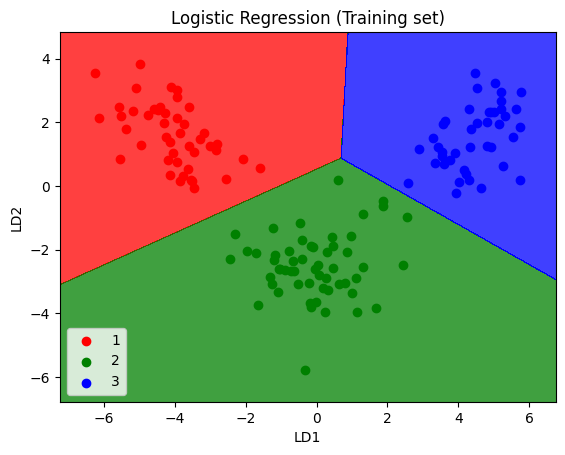

In [120]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

#### Test Set

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/1110361934.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


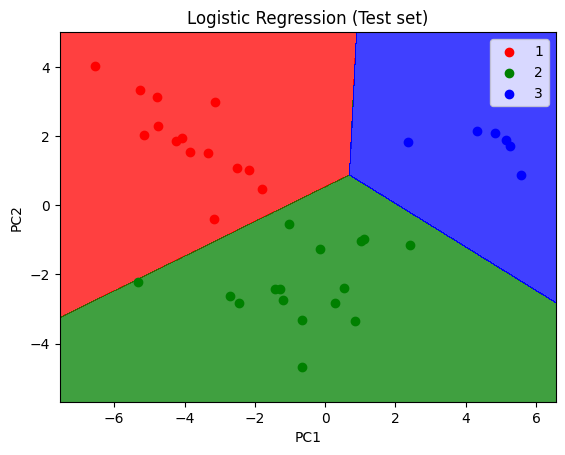

In [118]:
# Logistic Regression Results
X_set, y_set = lda.transform(sc.transform(X_test)), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Kernel PCA

### Data Prep

#### Read

In [89]:
dataset = pd.read_csv('data/Wine.csv')
dataset.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [90]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(178, 13)
<class 'numpy.ndarray'>
(178,)


### Train Test Split

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Apply Kernel PCA

In [94]:
from sklearn.decomposition import KernelPCA

In [95]:
# n_components is the final number of extracted features
# start with 2, increase if the prediction is not good enough
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)

### Train Model and Predict

In [96]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state = 0)
c_lr.fit(X_train, y_train)
y_pred_lr = c_lr.predict(kpca.transform(sc.transform(X_test)))

In [97]:
# SVM
from sklearn.svm import SVC
c_svc = SVC(kernel="rbf", random_state=0)
c_svc.fit(X_train,y_train)
y_pred_svc = c_svc.predict(kpca.transform(sc.transform(X_test)))

In [98]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
c_gnb = GaussianNB()
c_gnb.fit(X_train, y_train)
y_pred_gnb = c_gnb.predict(kpca.transform(sc.transform(X_test)))

In [99]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(n_estimators=10, random_state=0)
c_rf.fit(X_train, y_train)
y_pred_rf = c_rf.predict(kpca.transform(sc.transform(X_test)))

### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression: ",cm_lr)
print("Number of correct predictions using Logistic Regression: ",cm_lr[0][0] + cm_lr[1][1] + cm_lr[2][2])
print("Number of incorrect predictions using Logistic Regression: ",cm_lr[0][1] + cm_lr[0][2] + cm_lr[1][0] + cm_lr[1][2] + cm_lr[2][0] + cm_lr[2][1])

Confusion Matrix for Logistic Regression:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Logistic Regression:  36
Number of incorrect predictions using Logistic Regression:  0


In [102]:
# SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVC: ",cm_svc)
print("Number of correct predictions using SVC: ",cm_svc[0][0] + cm_svc[1][1] + cm_svc[2][2])
print("Number of incorrect predictions using SVC: ",cm_svc[0][1] + cm_svc[0][2] + cm_svc[1][0] + cm_svc[1][2] + cm_svc[2][0] + cm_svc[2][1])

Confusion Matrix for SVC:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using SVC:  36
Number of incorrect predictions using SVC:  0


In [103]:
# Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Naive Bayes: ",cm_gnb)
print("Number of correct predictions using Naive Bayes: ",cm_gnb[0][0] + cm_gnb[1][1] + cm_gnb[2][2])
print("Number of incorrect predictions using Naive Bayes: ",cm_gnb[0][1] + cm_gnb[0][2] + cm_gnb[1][0] + cm_gnb[1][2] + cm_gnb[2][0] + cm_gnb[2][1])

Confusion Matrix for Naive Bayes:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Naive Bayes:  36
Number of incorrect predictions using Naive Bayes:  0


In [104]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest: ",cm_rf)
print("Number of correct predictions using Random Forest: ",cm_rf[0][0] + cm_rf[1][1] + cm_rf[2][2])
print("Number of incorrect predictions using Random Forest: ",cm_rf[0][1] + cm_rf[0][2] + cm_rf[1][0] + cm_rf[1][2] + cm_rf[2][0] + cm_rf[2][1])

Confusion Matrix for Random Forest:  [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Number of correct predictions using Random Forest:  36
Number of incorrect predictions using Random Forest:  0


### Evaluate

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print("Accuracy for Logistic Regression: ",accuracy_score(y_test, y_pred_lr))
print("Accuracy for Logistic Regression with 3 components: ",accuracy_score(y_test, y_pred_lr_pca3))
print("Accuracy for SVC: ",accuracy_score(y_test, y_pred_svc))
print("Accuracy for Naive Bayes: ",accuracy_score(y_test, y_pred_gnb))
print("Accuracy for Random Forest: ",accuracy_score(y_test, y_pred_rf))

Accuracy for Logistic Regression:  1.0
Accuracy for Logistic Regression with 3 components:  1.0
Accuracy for SVC:  1.0
Accuracy for Naive Bayes:  1.0
Accuracy for Random Forest:  1.0


### Vizualize

#### Training Set

In [ ]:
from matplotlib.colors import ListedColormap

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/2123219577.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


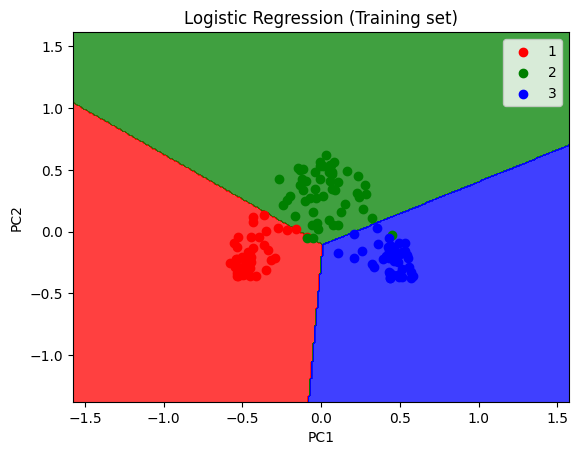

In [107]:
# Logistic Regression Results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_96971/1507198890.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


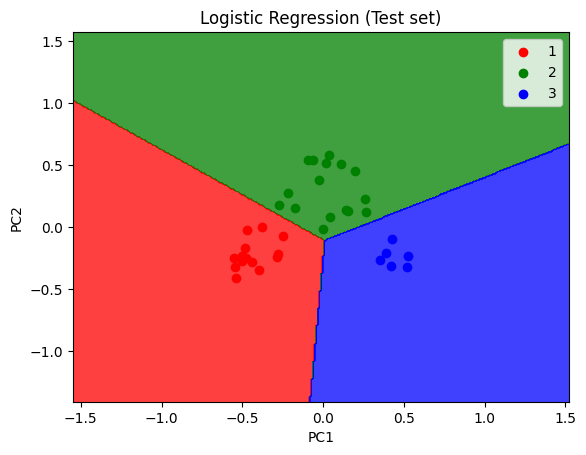

In [109]:
# Logistic Regression Results
X_set, y_set = kpca.transform(sc.transform(X_test)), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, c_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()